#UE 3.1 - TD3

In [1]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter, sobel

**EX 3**

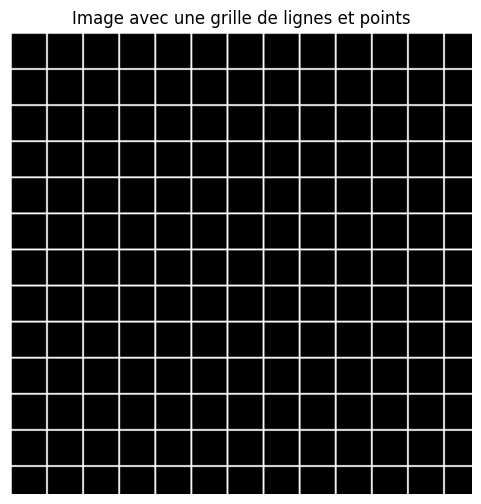

In [4]:
#Image de la question 2
def generate_pattern(size=256, spacing=20):
  image2a = np.zeros((size, size), dtype=np.uint8)
  for i in range(0, size, spacing):
    image2a[:,i] = 255
    image2a[i,:] = 255
  return image2a

image2a = generate_pattern()
plt.figure(figsize=(6,6))
plt.imshow(image2a, cmap='gray')
plt.title("Image avec une grille de lignes et points")
plt.axis("off")
plt.show()


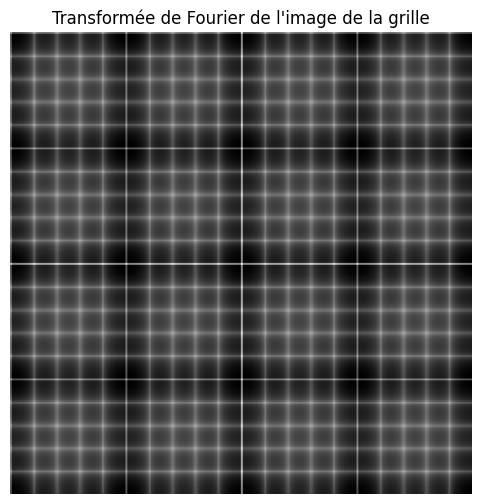

In [5]:
#Transformée de Fourier de l'image de la question 2
f_transform2a = np.fft.fft2(image2a)
f_shift2a = np.fft.fftshift(f_transform2a)
magnitude_spectrum2a = 20 * np.log(np.abs(f_shift2a) + 1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum2a, cmap='gray')
plt.title("Transformée de Fourier de l'image de la grille")
plt.axis("off")
plt.show()

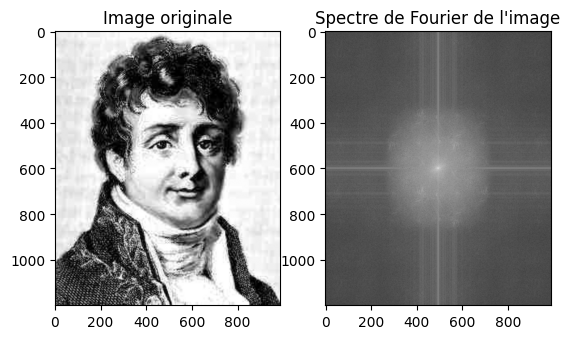

In [ ]:
#Application d'une transformée de Fourier à une image
image2b = cv2.imread("image_tf.jpg", 0)
f_2b = np.fft.fft2(image2b)
f_shift2b = np.fft.fftshift(f_2b)
magnitude_spectrum2b = 20 * np.log(np.abs(f_shift2b))

plt.subplot(121, title="Image originale")
plt.imshow(image2b, cmap='gray')
plt.subplot(122, title="Spectre de Fourier de l'image")
plt.imshow(magnitude_spectrum2b, cmap='gray')
plt.show()

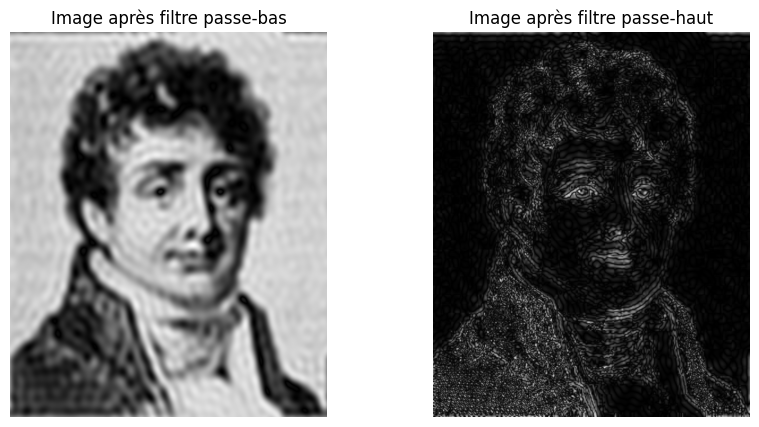

In [ ]:
#Filtrage de l'image
rows2b, cols2b = image2b.shape
crow2b, ccol2b = rows2b // 2, cols2b // 2

radius2b = 30
mask_low2b = np.zeros((rows2b, cols2b), np.uint8)
cv2.circle(mask_low2b, (ccol2b, crow2b), radius2b, 1, -1)

radius_high2b = 30
mask_high2b = np.ones((rows2b, cols2b), np.uint8)
cv2.circle(mask_high2b, (ccol2b, crow2b), radius_high2b, 0, -1)

#Application des masques
f_shift_low2b = f_shift2b * mask_low2b
f_shift_high2b = f_shift2b * mask_high2b

f_ishift_low2b = np.fft.ifftshift(f_shift_low2b)
image_low2b = np.fft.ifft2(f_ishift_low2b)
image_low2b = np.abs(image_low2b)

f_ishift_high2b = np.fft.ifftshift(f_shift_high2b)
image_high2b = np.fft.ifft2(f_ishift_high2b)
image_high2b = np.abs(image_high2b)

#Affichage des images filtrées
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(image_low2b, cmap='gray')
plt.title("Image après filtre passe-bas")
plt.axis("off")

plt.subplot(122)
plt.imshow(image_high2b, cmap='gray')
plt.title("Image après filtre passe-haut")
plt.axis("off")

plt.show()

**EX 4**

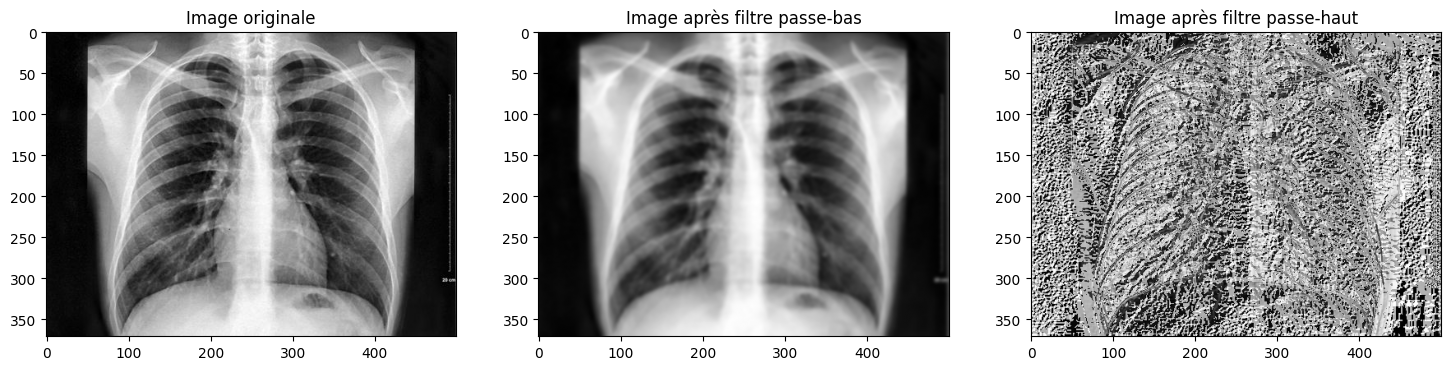

In [ ]:
#Importation de l'image
image3 = cv2.imread("image_filtre.jpg", cv2.IMREAD_GRAYSCALE)

sigma3 = 2

low_pass3 = gaussian_filter(image3, sigma=sigma3)

sobel_x3 = sobel(image3, axis=0)
sobel_y3 = sobel(image3, axis=1)
high_pass3 = np.hypot(sobel_x3, sobel_y3)

plt.figure(figsize=(18,6))
plt.subplot(131),
plt.imshow(image3, cmap='gray'), plt.title("Image originale")
plt.subplot(132),
plt.imshow(low_pass3, cmap='gray'), plt.title("Image après filtre passe-bas")
plt.subplot(133),
plt.imshow(high_pass3, cmap='gray'), plt.title("Image après filtre passe-haut")
plt.show()

**EX 5**

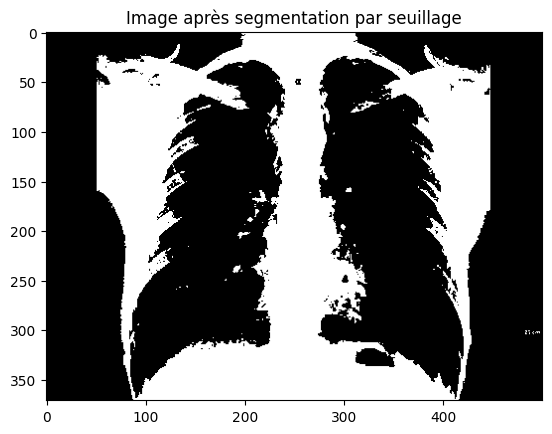

In [ ]:
#Seuillage de l'image de l'exercice 3
threshold4 = 150

_, segmented4 = cv2.threshold(image3, threshold4, 255, cv2.THRESH_BINARY)
plt.imshow(segmented4, cmap='gray')
plt.title("Image après segmentation par seuillage")
plt.show()

**EX 7**

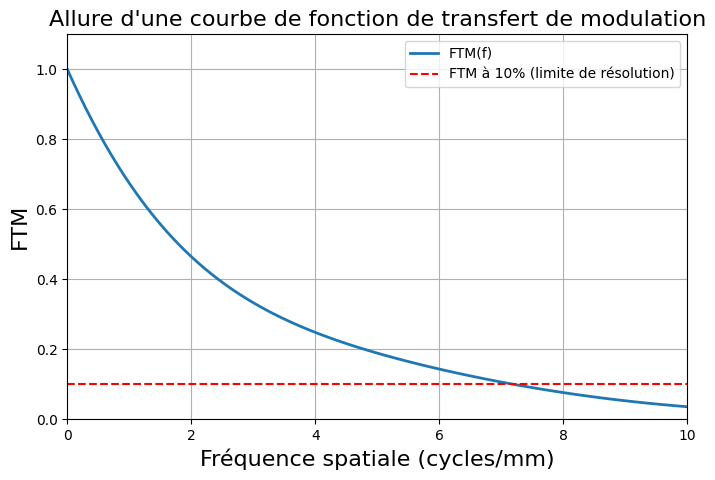

In [ ]:
frequencies7 = np.linspace(0, 10, 100)

FTM_values7 = np.exp(-frequencies7 / 3) * (1 - 0.1 * np.sin(2 * np.pi * frequencies7 / 10))

plt.figure(figsize=(8,5))
plt.plot(frequencies7, FTM_values7, label="FTM(f)", linewidth=2)
plt.axhline(y=0.1, color='red', linestyle='--', label="FTM à 10% (limite de résolution)")
plt.xlabel("Fréquence spatiale (cycles/mm)", fontsize=16)
plt.ylabel("FTM", fontsize=16)
plt.title("Allure d'une courbe de fonction de transfert de modulation", fontsize=16)
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()